# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** I Nyoman Adi Mahendra Putra
- **Email:** henptra@gmail.com
- **ID Dicoding:** henptra

## Menentukan Pertanyaan Bisnis

- Bagaimana perkembangan penggunaan rental sepeda dari tahun 2011 ke 2012?
- Seberapa banyak penggunaan rental sepeda berdasarkan musim atau season (springer, summer, fall, winter)?
- Bagaimanakah dampak hari kerja (workingday) dan hari libur(holiday) terhadap pengguna (casual dan registered) saat melakukan rental?


## Import Semua Packages/Library yang Digunakan

In [399]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Data Description

Deskripsi Data
Tahapan ini digunakan untuk mengumpulkan semua dataset. Dataset yang digunakan berdasarkan pilihan dari platform Dicoding yakni Bike Sharing Dataset. Dataset ini bersumber pada kaggle.com. Dataset terdiri dari dua yakni hour.csv dan day.csv

Keterangan kolom pada dataset:
1. instant: record index
2. dteday : date
3. season : season (1:springer, 2:summer, 3:fall, 4:winter)
4. yr : year (0: 2011, 1:2012)
5. mnth : month ( 1 to 12)
6. hr : hour (0 to 23)
7. holiday : weather day is holiday or not (extracted from [Web Link])
8. weekday : day of the week
9. workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
10. weathersit :
* 1: Clear, Few clouds, Partly cloudy, Partly cloudy
* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
11. temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
12. hum: Normalized humidity. The values are divided to 100 (max)
windspeed: Normalized wind speed. The values are divided to 67 (max)
13. casual: count of casual users
14. registered: count of registered users
15. cnt: count of total rental bikes including both casual and registered

source: https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset





#### import day data
proses ini digunakan untuk menempatkan dataset yang digunakan kedalam bentuk dataframe (df)

In [400]:
day_df = pd.read_csv("/content/day.csv")
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


#### import hour data
proses ini digunakan untuk menempatkan dataset yang digunakan kedalam bentuk dataframe (df)

In [401]:
hour_df = pd.read_csv("/content/hour.csv")
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Assessing Data

Assessing data atau menilai data ini digunakan agar mengetahui apakah adanya masalah umum dalam sebuah data seperti missing value dan duplicate data.

#### assessing `day.csv`

In [402]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [403]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [404]:
day_df.duplicated().sum()

0

#### assessing `hour.csv`

In [405]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [406]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [407]:
hour_df.duplicated().sum()

0

In [408]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### **Insight:**
- Kedua dataset tidak memiliki missing value
- Kedua dataset tidak memiliki duplicate value

### Cleaning Data


Pada tahap ini, cleaning dilakukan hanya bertujuan untuk mengubah beberapa format data untuk lebih mudah dipahami. Untuk format, akan menyesuaikan data description. Beberapa kolom akan diubah dari tipe int menjadi tipe data category, ini digunakan untuk memudahkan ekplorasi data nantinya.

In [409]:
print("Tipe kolom pada dataframe sebelum melakukan cleaning:")
day_df.info()
hour_df.info()

Tipe kolom pada dataframe sebelum melakukan cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
R

#### Cleaning `day.csv`

In [410]:
# mengubah beberapa tipe kolom menjadi katagorikal sesuai format pada data description
day_df['mnth'] = pd.Categorical(day_df['mnth'].replace({
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}))

day_df['season'] = pd.Categorical(day_df['season'].replace({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
}))

day_df['weekday'] = pd.Categorical(day_df['weekday'].replace({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
}))

day_df['weathersit'] = pd.Categorical(day_df['weathersit'].replace({
    1: ' Clear, Few clouds, Partly cloudy',
    2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
    3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
    4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
}))

day_df['yr'] = pd.Categorical(day_df['yr'].replace({
    0: '2011', 1: '2012'
}))

day_df['workingday'] = pd.Categorical(day_df['workingday'].replace({
    0: 'Holiday', 1: 'Workingday'
}))

day_df['dteday'] = pd.to_datetime(day_df['dteday'], format='%Y-%m-%d') #mengubah tanggal menjadi datetime

print("tipe kolom pada dataframe setelah cleaning:")
day_df.info()

tipe kolom pada dataframe setelah cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    in

#### Cleaning `hour.csv`

In [411]:
# mengubah beberapa tipe kolom menjadi katagorikal sesuai format pada data description
hour_df['mnth'] = pd.Categorical(hour_df['mnth'].replace({
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}))

hour_df['season'] = pd.Categorical(hour_df['season'].replace({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
}))

hour_df['weekday'] = pd.Categorical(hour_df['weekday'].replace({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
}))

hour_df['weathersit'] = pd.Categorical(hour_df['weathersit'].replace({
    1: ' Clear, Few clouds, Partly cloudy',
    2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
    3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
    4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
}))

hour_df['yr'] = pd.Categorical(hour_df['yr'].replace({
    0: '2011', 1: '2012'
}))

hour_df['workingday'] = pd.Categorical(hour_df['workingday'].replace({
    0: 'Holiday', 1: 'Workingday'
}))

hour_df['dteday'] = pd.to_datetime(hour_df['dteday'], format='%Y-%m-%d') #mengubah tanggal menjadi datetime

print("tipe kolom pada dataframe setelah cleaning:")
hour_df.info()

tipe kolom pada dataframe setelah cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null

#### **Insight:**
- Kedua dataset sudah melakukan proses cleaning yang bertujuan untuk memudahkan eksplorasi data nantinya

In [412]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,Sat,Holiday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,0,Sun,Holiday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,0,Mon,Workingday,"Clear, Few clouds, Partly cloudy",0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,Tue,Workingday,"Clear, Few clouds, Partly cloudy",0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,Wed,Workingday,"Clear, Few clouds, Partly cloudy",0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [413]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,0,Sat,Holiday,"Clear, Few clouds, Partly cloudy",0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,0,Sat,Holiday,"Clear, Few clouds, Partly cloudy",0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,0,Sat,Holiday,"Clear, Few clouds, Partly cloudy",0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,0,Sat,Holiday,"Clear, Few clouds, Partly cloudy",0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,0,Sat,Holiday,"Clear, Few clouds, Partly cloudy",0.24,0.2879,0.75,0.0,0,1,1


#### Menyimpan dataset bersih untuk pembuatan dashboard

In [414]:
day_df.to_csv('day_clean.csv', index=False)

## Exploratory Data Analysis (EDA)

Pada tahap ini dilakukan eksplorasi dataset untuk menjawab pertanyaan bisnis. Dikarenakan pertanyaan bisnis tidak memerlukan keterkaitan antara kedua csv, maka akan digunakan dataset harian saja.


### Explore `day_df`

#### Explore Question 1

Pertanyaan ini menyatakan bagaimana perkembangan rental sepeda dari tahun 2011 ke 2012. Ini erat kaitannya dengan kolom 'yr' yang menyatakan tahun.

In [415]:
day_df.groupby(by="yr").agg({
    "cnt": ["max", "min", "mean", "std"]
})

<ipython-input-415-735f1a052a27>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="yr").agg({


cnt                               
       max  min         mean          std
yr                                       
2011  6043  431  3405.761644  1378.753666
2012  8714   22  5599.934426  1788.667868

**Insight:**
- Berdasarkan hasil rata-rata atau mean, terjadi perkembangan penggunaan rental sepeda yang cukup signifikan.

#### Explore Question 2

Pertanyaan ini menyatakan bahwa bagaimana pengaruh musim terhadap rental sepeda. Ini berhubungan dengan kolom 'season'yang menyatakan sebagai musim penggunaan rental sepeda.

In [416]:
day_df.groupby(by="season").agg({
    "cnt": ["max", "min", "mean", "sum"]
})

<ipython-input-416-ccf11a4658c8>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="season").agg({


cnt                            
         max   min         mean      sum
season                                  
Fall    8714  1115  5644.303191  1061129
Spring  7836   431  2604.132597   471348
Summer  8362   795  4992.331522   918589
Winter  8555    22  4728.162921   841613

**Insight:**
- Berdasarkan hasil rata-rata atau mean, musim yang paling banyak pengguna rental sepeda adalah Fall, diikuti oleh Summer, Winter, dan Spring.

#### Explore Question 3

Pertanyaan ini menyatakan bagaimana penggunaan rental sepeda saat hari kerja dan hari libur. Ini diterangkan pada kolom 'workingday' yang menyatakan keterangan hari kerja atau hari libur.

In [417]:
day_df.groupby('workingday').agg({
    'casual': ['max', 'min', 'mean', 'sum'],
    'registered': ['max', 'min', 'mean', 'sum'],
    'cnt': ['max', 'min', 'mean', 'sum']
})

<ipython-input-417-78a47bacbb23>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby('workingday').agg({


casual                          registered                    \
              max min         mean     sum        max  min         mean   
workingday                                                                
Holiday      3410  54  1371.134199  316732       5966  451  2959.034632   
Workingday   2469   2   606.570000  303285       6946   20  3978.250000   

                      cnt                             
                sum   max  min         mean      sum  
workingday                                            
Holiday      683537  8714  605  4330.168831  1000269  
Workingday  1989125  8362   22  4584.820000  2292410

**Insight:**
- Berdasarkan hasil rata-rata atau mean, penggunaan rental sepeda tidak jauh signifikan saat hari libur dan
- Pengguna Registered lebih banyak saat hari keja dan hari libur

## Visualization & Explanatory Analysis

Proses ini digunakan untuk memvisualisasikan Dataset

### Pertanyaan 1: Bagaimana perkembangan penggunaan rental sepeda dari tahun 2011 ke 2012?


In [425]:
day_df.groupby(by="yr").agg({
    "cnt": ["max", "min", "mean", "std"]
})

<ipython-input-425-735f1a052a27>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="yr").agg({


cnt                               
       max  min         mean          std
yr                                       
2011  6043  431  3405.761644  1378.753666
2012  8714   22  5599.934426  1788.667868

<ipython-input-418-69cb8837dc92>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  show_data = day_df.groupby(by=["mnth", "yr"]).agg({"cnt": "sum"}).reset_index()
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


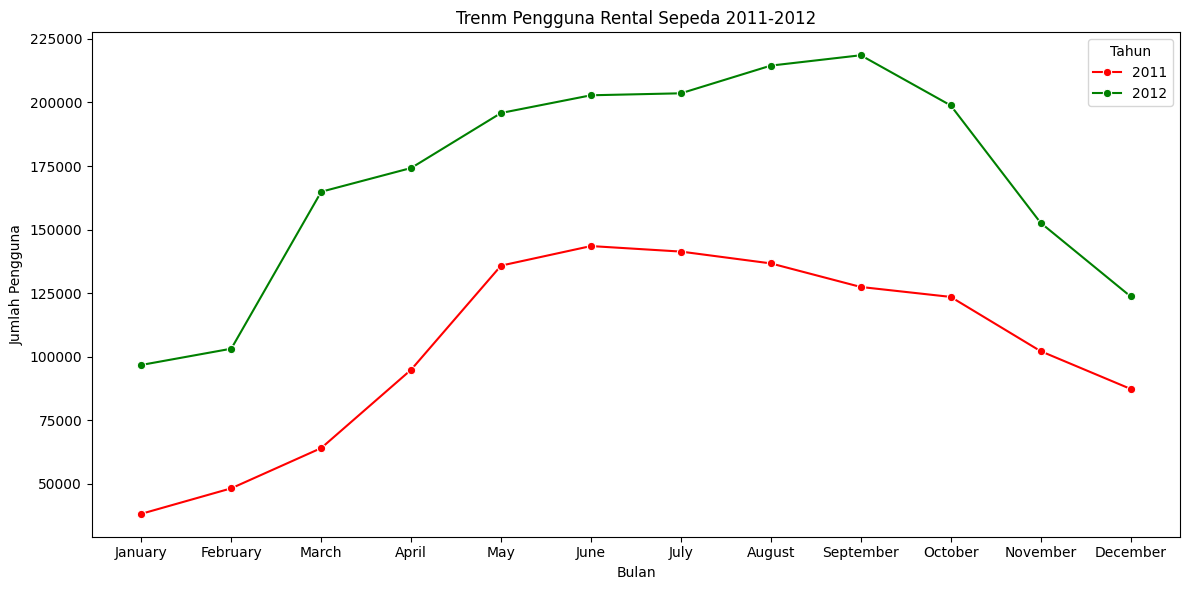

In [418]:
# Pertama kita melakukan group pada kolom yang dibutuhkan saja, seperti pada langkah EDA
# Kita menyertakan kolom "mnth" untuk memvisualisasikan perkembangan perbulannya untuk tahun 2011 dan 2012
# Pada akhit kita menerapkan reset index, hal ini dikarenakan method groupby() biasanya membuat dataframe dengan index baru
# Hal tersebut akan menyebabkan error, dikarenakan sns mendeteksi bahwa kolom mnth dan yr merupakan index
show_data = day_df.groupby(by=["mnth", "yr"]).agg({"cnt": "sum"}).reset_index()

# Setelah melakukan reset index, biasanya data akan diurutkan berdasarkan "alfabet"
# Kita harus mengurutkan kembali berdasarkan bulan
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
show_data['mnth'] = pd.Categorical(show_data['mnth'], categories=month_order, ordered=True)

# Disini saya menggunakan visual linechart, untuk melihat perkembangan tiap bulannya
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=show_data,
    x="mnth",
    y="cnt",
    hue="yr",
    palette={'2011': 'red', '2012': 'green'},
    marker="o"
)

plt.title("Trenm Pengguna Rental Sepeda 2011-2012")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pengguna")
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()

plt.show()

**Insight:**
- Dilihat tiap bulannya, data pengguna rental sepeda terus bertambah dari tahun 2011 ke 2012

### Pertanyaan 2: Seberapa banyak penggunaan rental sepeda berdasarkan musim atau season (springer, summer, fall, winter)?



In [426]:
day_df.groupby(by="season").agg({
    "cnt": ["max", "min", "mean", "sum"]
})

<ipython-input-426-ccf11a4658c8>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="season").agg({


cnt                            
         max   min         mean      sum
season                                  
Fall    8714  1115  5644.303191  1061129
Spring  7836   431  2604.132597   471348
Summer  8362   795  4992.331522   918589
Winter  8555    22  4728.162921   841613

<ipython-input-419-8de8dd337ce7>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  show_data2 = day_df.groupby('season')['cnt'].sum().reset_index()


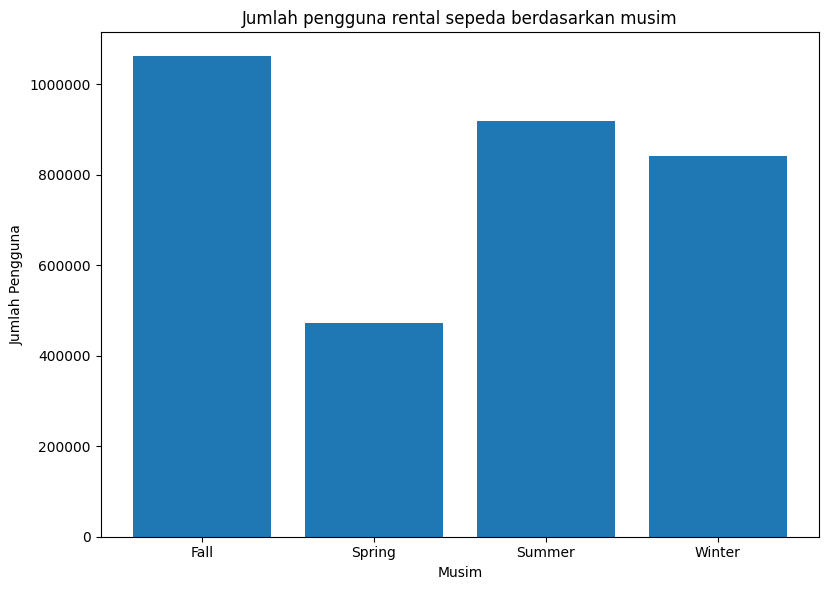

In [419]:
show_data2 = day_df.groupby('season')['cnt'].sum().reset_index()
plt.figure(figsize=(8, 6))
plt.bar(x=show_data2['season'], height=show_data2['cnt'])
plt.title('Jumlah pengguna rental sepeda berdasarkan musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Pengguna')
plt.tight_layout()
plt.ticklabel_format(style='plain', axis='y')  # Agar format tetap pada angka yang ditunjukan

plt.show()

<ipython-input-424-5ee75dbb5281>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  show_data2 = day_df.groupby('season')['cnt'].sum().reset_index()


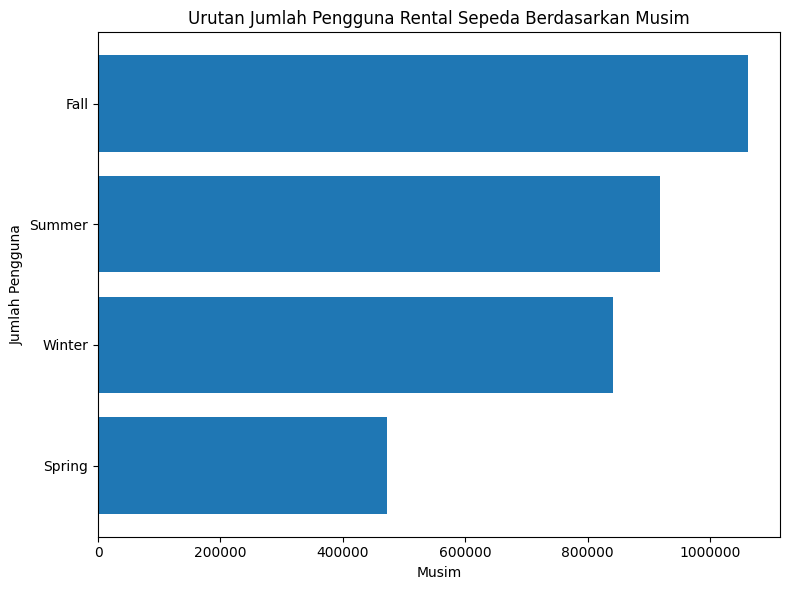

In [424]:
# Membuat plot bar berdasarkan urutan
show_data2 = day_df.groupby('season')['cnt'].sum().reset_index()

# Mengurutkan DataFrame berdasarkan jumlah pengguna
sort_df = show_data2.sort_values(by='cnt', ascending=True)
plt.figure(figsize=(8, 6))
plt.barh(y=sort_df['season'], width=sort_df['cnt'])
plt.title('Urutan Jumlah Pengguna Rental Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Pengguna')
plt.tight_layout()
plt.ticklabel_format(style='plain', axis='x')  # Agar format tetap pada angka yang ditunjukan

plt.show()

**Insight:**
- Terlihat bahwa urutan pengguna terbanyak menurut musim yakni Fall, Summer, Winter, Spring.

### Pertanyaan 3: - Bagaimanakah dampak hari kerja (workingday) dan hari libur(holiday) terhadap pengguna (casual dan registered) saat melakukan rental?

In [427]:
day_df.groupby('workingday').agg({
    'casual': ['max', 'min', 'mean', 'sum'],
    'registered': ['max', 'min', 'mean', 'sum'],
    'cnt': ['max', 'min', 'mean', 'sum']
})

<ipython-input-427-78a47bacbb23>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby('workingday').agg({


casual                          registered                    \
              max min         mean     sum        max  min         mean   
workingday                                                                
Holiday      3410  54  1371.134199  316732       5966  451  2959.034632   
Workingday   2469   2   606.570000  303285       6946   20  3978.250000   

                      cnt                             
                sum   max  min         mean      sum  
workingday                                            
Holiday      683537  8714  605  4330.168831  1000269  
Workingday  1989125  8362   22  4584.820000  2292410

<ipython-input-421-fb2e32308cb1>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  show_data3 = day_df.groupby('workingday').agg({


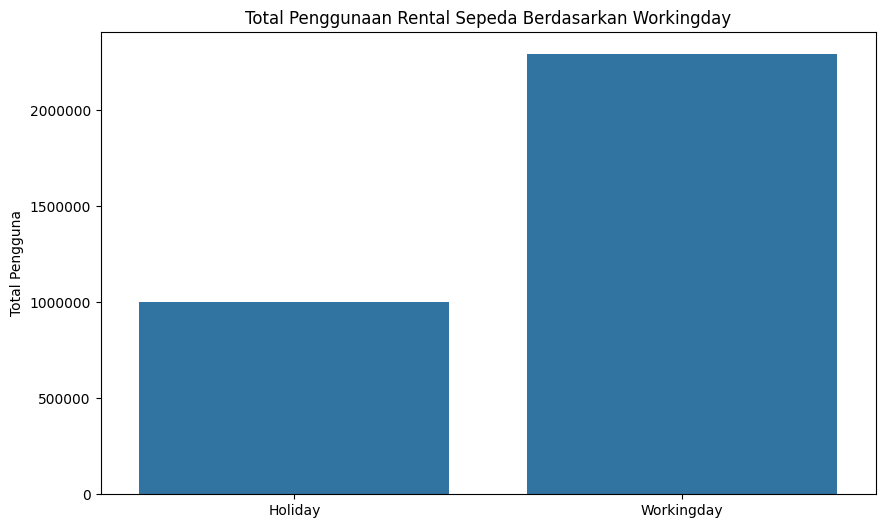

In [421]:
# Pertama kita melakukan group pada kolom yang dibutuhkan saja, seperti pada langkah EDA
show_data3 = day_df.groupby('workingday').agg({
    'cnt': 'sum',
}).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=show_data3, x='workingday', y='cnt')
plt.title('Total Penggunaan Rental Sepeda Berdasarkan Workingday')
plt.xlabel('')
plt.ylabel('Total Pengguna')
plt.ticklabel_format(style='plain', axis='y')  # Agar format tetap pada angka yang ditunjukan

plt.show()

<ipython-input-422-4fec958d96c5>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  show_data2 = day_df.groupby('workingday').agg({
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


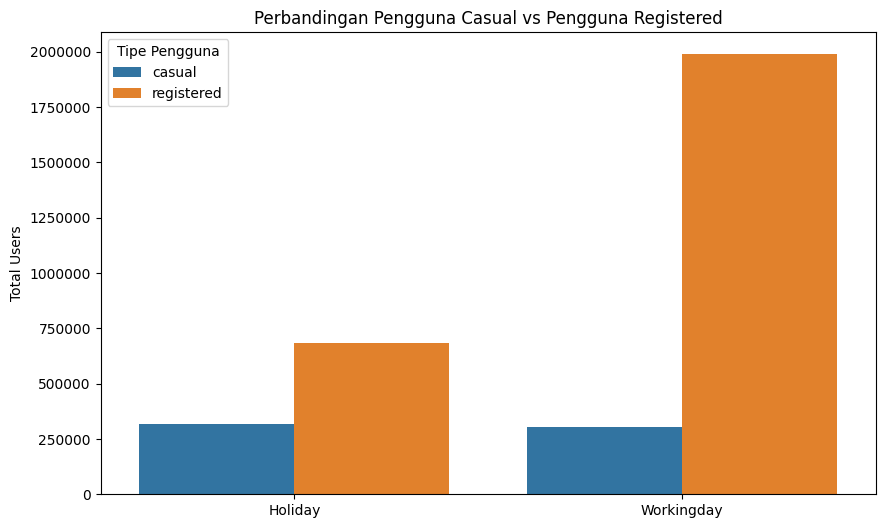

In [422]:
# Pertama kita melakukan group pada kolom yang dibutuhkan saja, seperti pada langkah EDA
show_data2 = day_df.groupby('workingday').agg({
    'casual': 'sum',
    'registered': 'sum'
}).reset_index()

# Melt data untuk menyatukan data casual dan registered
# Hal ini dilakukan karena hasil group by menyatakan kolom casual, dan registered berada pada kolom berbeda.
# Solusinya adalah menggunakan "_melt" untuk menggabungkan menjadi 1 kolom dengan nama "Tipe Pengguna"
show_data2_melt = show_data2.melt(id_vars='workingday', value_vars=['casual', 'registered'],
                                  var_name='Tipe Pengguna', value_name='Count')

# Plot clustered bar chart
# Disini saya memilih visualisasi ini untuk mengetahui perbandingan antara Casual dan Registered
plt.figure(figsize=(10, 6))
sns.barplot(data=show_data2_melt, x='workingday', y='Count', hue='Tipe Pengguna')
plt.title('Perbandingan Pengguna Casual vs Pengguna Registered')
plt.xlabel('')
plt.ylabel('Total Users')
plt.ticklabel_format(style='plain', axis='y')  # Agar format tetap pada angka yang ditunjukan


plt.show()

**Insight:**
- Pengguna rental sepeda terlihat jelas lebih banyak digunakan saat workingday
- Pengguna registered lebih banyak menggunakan rental sepeda saat workingday maupun holiday

## Conclusion

#### Pertanyaan 1: Bagaimana perkembangan penggunaan rental sepeda dari tahun 2011 ke 2012?



Dari tahun 2011 ke 2012, terjadi perkembangan penggunaan rental sepeda yang cukup mengalami kenaikan. Terlihat pada visualisasi bahwa setiap bulannya mengalami angka kenaikan pengguna rental sepeda.

#### Pertanyaan 2: Seberapa banyak penggunaan rental sepeda berdasarkan musim atau season (springer, summer, fall, winter)?


Berdasarkan hasil EDA dan visualisasi, pengguna rental sepeda lebih banyak terjadi pada musim Fall (1061129 pengguna), diikuti oleh Summer(918589 pengguna), Winter(841613 pengguna), dan Spring (471348).

#### Pertanyaan 3: Bagaimanakah dampak hari kerja (workingday) dan hari libur(holiday) terhadap pengguna (casual dan registered) saat melakukan rental?

Berdasarkan analisis, penggunaan rental sepeda workingday lebih banyak dua kali lipat dibanding holiday atau hari libur. Sehingga pada workingday pengguna rental sepeda lebih padat. Pengguna Registered lebih banyak melakukan rental daripada casual.